<a href="https://colab.research.google.com/github/busrasari/Machine-Learning-Project/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap #Çıkan sonuçları görselleştirmek için

In [3]:
from sklearn.preprocessing import StandardScaler # for standartization
from sklearn.model_selection import train_test_split # train ve test veri seti olarak ikiye ayırmayı sağlar
from sklearn.model_selection import GridSearchCV # KNN ile ilgili best parametreleri bulurken kullanıyoruz
from sklearn.metrics import accuracy_score  # Çıkan sonuçları değerlendirmek için metric kullanmak gerekiyor. Bunlardan en temeli accuracy'i kullanıcam.
from sklearn.metrics import confusion_matrix #accuracyle çıkan sonuç(fex: %30 başarılı %70 bşız) ama nerede hata yaptığımızı bulma konusunda confusion_matrix yardımcı
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA 

In [4]:
# warning library
import warnings
warnings.filterwarnings("ignore")


In [5]:
# verileri yüklüyoruz
data = pd.read_csv("data.csv")
data.drop(['Unnamed: 32', 'id'], inplace = True, axis = 1)
print(data);

    diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0           M        17.99  ...          0.4601                  0.11890
1           M        20.57  ...          0.2750                  0.08902
2           M        19.69  ...          0.3613                  0.08758
3           M        11.42  ...          0.6638                  0.17300
4           M        20.29  ...          0.2364                  0.07678
..        ...          ...  ...             ...                      ...
564         M        21.56  ...          0.2060                  0.07115
565         M        20.13  ...          0.2572                  0.06637
566         M        16.60  ...          0.2218                  0.07820
567         M        20.60  ...          0.4087                  0.12400
568         B         7.76  ...          0.2871                  0.07039

[569 rows x 31 columns]


In [6]:
data = data.rename(columns = {"diagnosis":"target"})

B    357
M    212
Name: target, dtype: int64


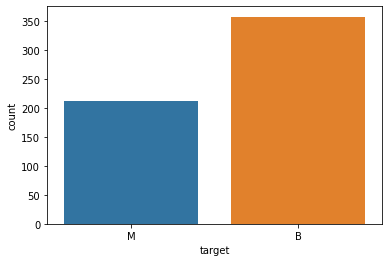

In [7]:
sns.countplot(data["target"])
print(data.target.value_counts())

In [8]:
data["target"] = [1 if i.strip() == "M" 
                  else 0 for i in data.target]
print(data)

     target  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0         1        17.99  ...          0.4601                  0.11890
1         1        20.57  ...          0.2750                  0.08902
2         1        19.69  ...          0.3613                  0.08758
3         1        11.42  ...          0.6638                  0.17300
4         1        20.29  ...          0.2364                  0.07678
..      ...          ...  ...             ...                      ...
564       1        21.56  ...          0.2060                  0.07115
565       1        20.13  ...          0.2572                  0.06637
566       1        16.60  ...          0.2218                  0.07820
567       1        20.60  ...          0.4087                  0.12400
568       0         7.76  ...          0.2871                  0.07039

[569 rows x 31 columns]


0    357
1    212
Name: target, dtype: int64


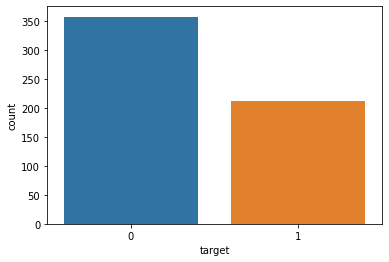

In [9]:
sns.countplot(data["target"])
print(data.target.value_counts())

In [10]:
print(len(data))

569


In [11]:
print("Data Shape: " , data.shape)

Data Shape:  (569, 31)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [13]:
data.describe()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#**Exploratory Data Science**


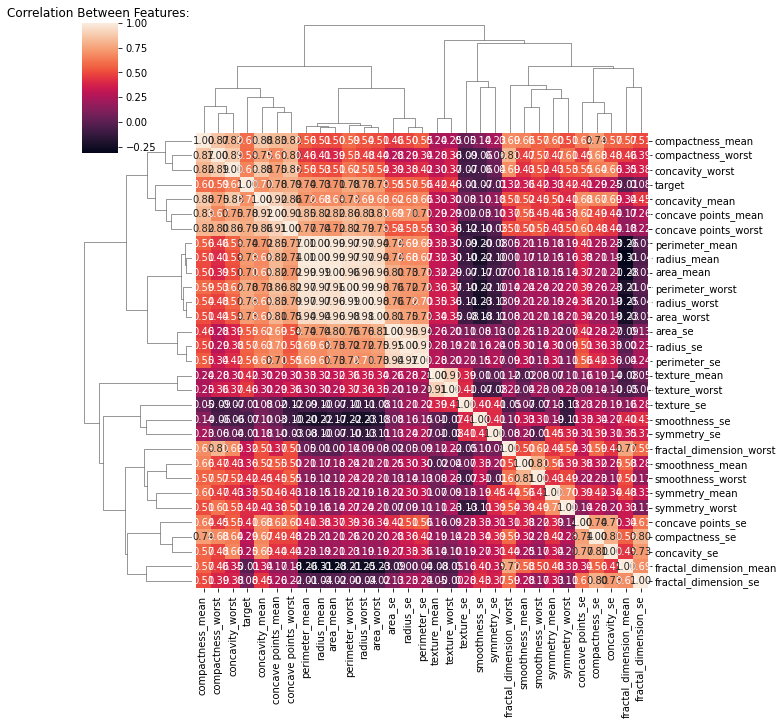

In [14]:
# Correlation

corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Between Features: ")
plt.show()

Text(0.5, 1.0, 'Correlation Between Features w Corr Threshold 0.75')

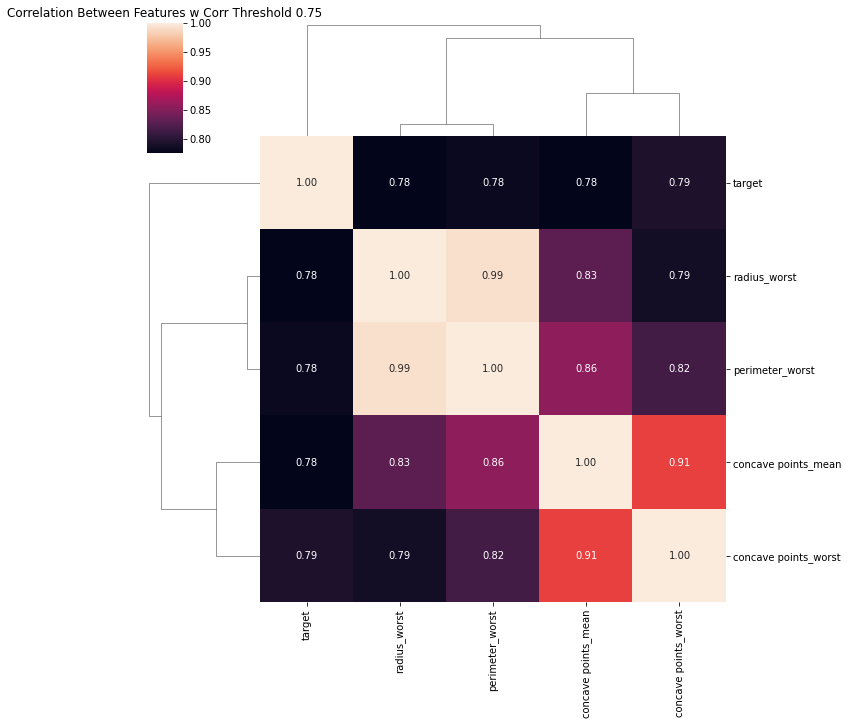

In [15]:
threshold = 0.75 #sadece 0.75 üstündeki değişkenlere bakıyoruz
filtre = np.abs(corr_matrix["target"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Threshold 0.75")


there some correlated features

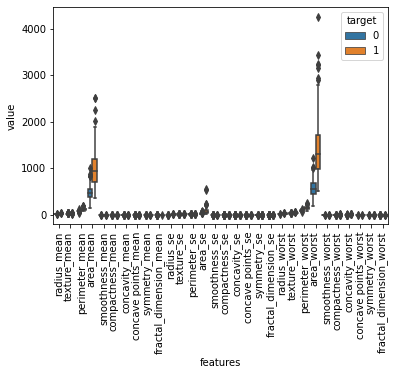

In [16]:
data_melted = pd.melt(data, id_vars= "target",
                      var_name = "features", 
                      value_name = "value")
plt.figure()
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

Standardization- normalization

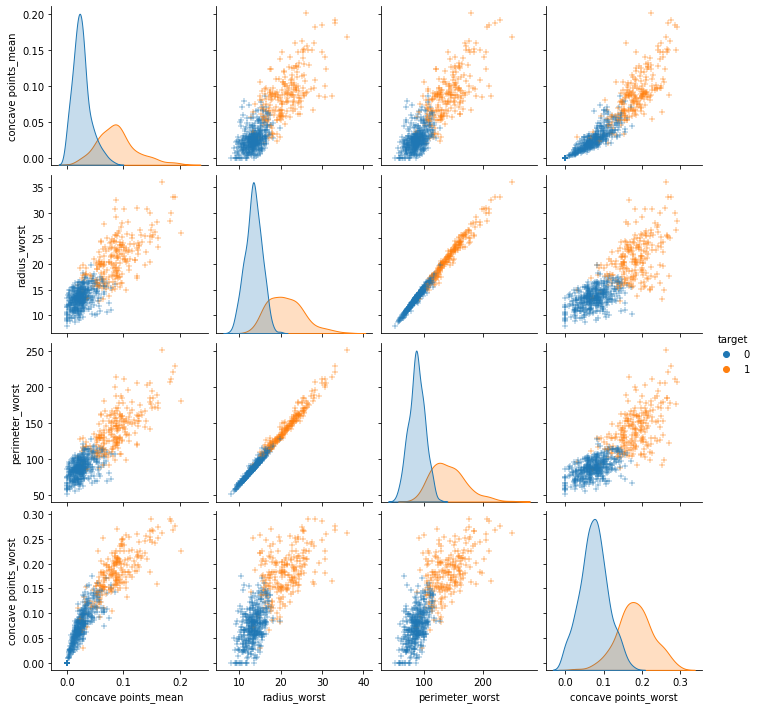

In [18]:
sns.pairplot(data[corr_features], diag_kind="kde", markers= "+", hue = "target")
plt.show()